# Diabetes Detection submission by Prem Bharwani

#### Importing all the modules


In [108]:
import pandas as pd
import sys
import io
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

#### Load the csv file

In [43]:
#note that I have locally stored the dataset file in the same directory as the notebook
Data = pd.read_csv("diabetes2.csv")
Data.isna().any().any()
Data.isnull().any().any()

False

#### Please note that the dataset has NO missing values ,No preprocessing required so we're good to go !

#### Seperating the features and the target

In [32]:
#Getting the "Outcome" column and then Dropping the column 'Outcome' from the Data (Axis=1 indicates that the column should be dropped!)
y=Data["Outcome"]
X=Data.drop("Outcome",axis=1)
# X.head()
# type(y)

#### Splitting in the given ratio using the train_test_split function of sklearn

In [34]:
x_train , x_test , y_train , y_test = train_test_split( X, y , test_size=0.2 , random_state=4)
# y_train.head()

#### Training the model using Logistic Regression

In [51]:
# model = LogisticRegression(max_iter=500)
# model.fit(x_train,y_train)

NameError: name 'kwargs' is not defined

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


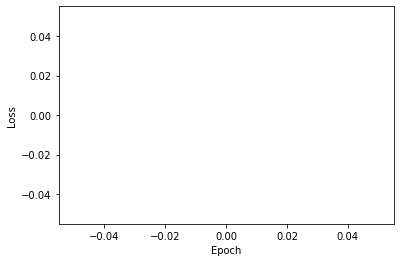

In [110]:
class DisplayLossCurve(object):
  def __init__(self, print_loss=False):
    self.print_loss = print_loss

  """Make sure the model verbose is set to 1"""
  def __enter__(self):
    self.old_stdout = sys.stdout
    sys.stdout = self.mystdout = io.StringIO()
  
  def __exit__(self, *args):
    sys.stdout = self.old_stdout
    loss_history = self.mystdout.getvalue()
    loss_list = []
    for line in loss_history.split('\n'):
      if(len(line.split("loss: ")) == 1):
        continue
      loss_list.append(float(line.split("loss: ")[-1]))
    plt.figure()
    plt.plot(np.arange(len(loss_list)), loss_list)
    plt.xlabel("Epoch")
    plt.ylabel("Loss")

    if self.print_loss:
      print("=============== Loss Array ===============")
      print(np.array(loss_list))
      
    return True

model = LogisticRegression(verbose=1,max_iter=500)

with DisplayLossCurve():
  model.fit(x_train, y_train)



In [72]:
predictions = model.predict(x_test)
model_score = model.score(x_test,y_test)
print(model_score)
# help(model)